<a href="https://colab.research.google.com/github/AnanyaUp/Quantum-Machine-Learning/blob/main/QML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment-3**

In [ ]:
!pip install qiskit qiskit-aer

In [ ]:
# Verify Qiskit version
import qiskit
qiskit.__version__

'2.2.1'

In [ ]:
# The first qubit
from qiskit import QuantumCircuit

# Create a quantum circuit with one qubit and one classical bit
qc = QuantumCircuit(1, 1)

# Define initial_state as |1>
initial_state = [0,1]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

# Add a measurement to the circuit
qc.measure(0, 0)

In [ ]:
# Listing 3.3: Prepare the simulation backend
from qiskit_aer import AerSimulator

# Tell Qiskit how to simulate our circuit
backend = AerSimulator()

# Do the simulation, returning the result
result = backend.run(qc).result()

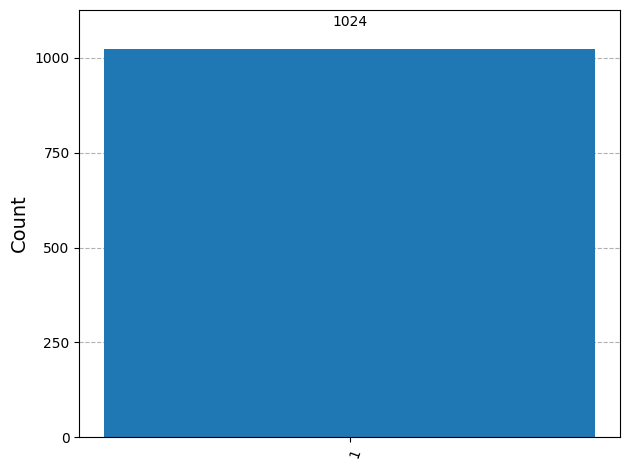

In [ ]:
# Listing 3.4: The measured qubit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# get the probability distribution from the simulation result
counts = result.get_counts(qc)

# Show the histogram
plot_histogram(counts)

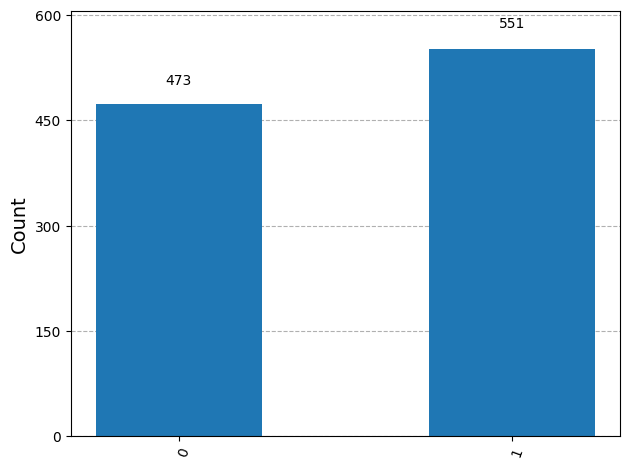

In [ ]:
# Listing 3.5: First attempt to superpose two states
# Define state |psi>
import numpy as np
initial_state = [1/np.sqrt(2), 1/np.sqrt(2)]

# Redefine the quantum circuit with one qubit and one classical bit for measurement
qc = QuantumCircuit(1, 1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# Add a measurement to the circuit
qc.measure(0, 0)

# execute the qc using the backend defined in the previous cell
results = backend.run(qc).result().get_counts()

# plot the results
plot_histogram(results)

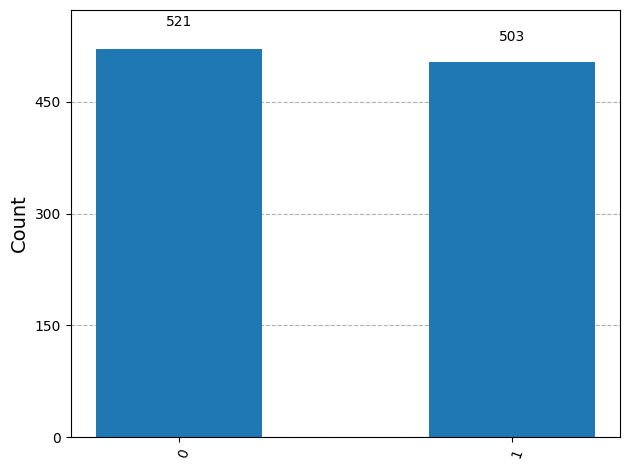

In [ ]:
# Listing 3.6: Weighted initial state
from math import sqrt
from qiskit import QuantumCircuit

# Define state |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit with one qubit and one classical bit for measurement
qc = QuantumCircuit(1, 1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# Add a measurement to the circuit
qc.measure(0, 0)

# execute the qc using the backend defined in the previous cell
results = backend.run(qc).result().get_counts()

# plot the results
plot_histogram(results)

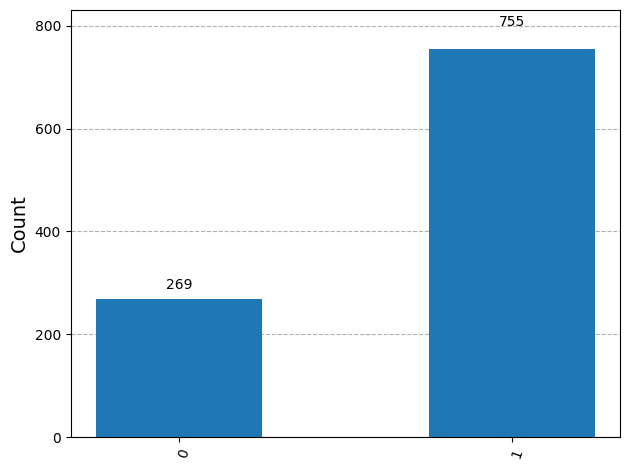

In [ ]:
# Listing 3.7: The qubit with a probability of 0.25 to result in 0
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import sqrt

qc = QuantumCircuit(1, 1) # Add a classical bit for measurement
initial_state = [1/2, sqrt(3)/2] # Here, we insert the state
qc.initialize(initial_state, 0)
qc.measure(0, 0) # Add a measurement
backend = AerSimulator() # Use AerSimulator directly
result = backend.run(qc).result() # Use backend.run()
counts = result.get_counts()
plot_histogram(counts)

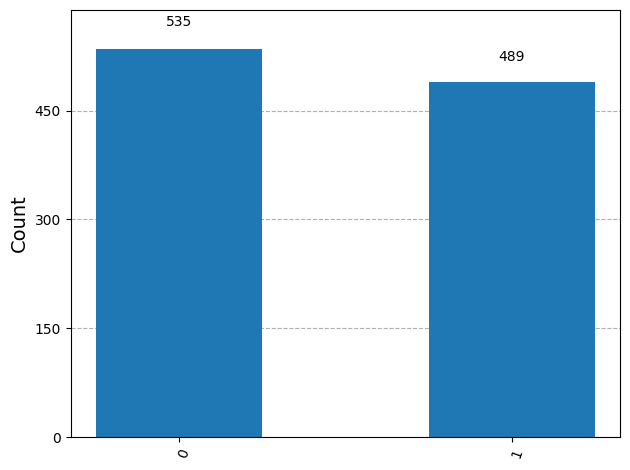

In [ ]:
# Listing 3.8: Using theta to specify the quantum state vector
from math import pi, cos, sin
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator # Import AerSimulator from qiskit_aer
from qiskit.visualization import plot_histogram

def get_state (theta):
    """returns a valid state vector"""
    return [cos(theta/2), sin(theta/2)]

# play with the values for theta to get a feeling
theta = -pi/2 # affects the probabilities


# create, initialize, and execute the quantum circuit
qc = QuantumCircuit(1, 1) # Add a classical bit for measurement
qc.initialize(get_state(theta), 0)
qc.measure(0, 0) # Add a measurement to get counts
backend = AerSimulator() # Use AerSimulator directly
result = backend.run(qc).result() # Use backend.run()
counts = result.get_counts() # Get counts from the result

# Show the histogram
plot_histogram(counts)

In [ ]:
# Listing 3.9: A circuit without measurement
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator # Import AerSimulator from qiskit_aer
from qiskit.visualization import plot_histogram
from math import sqrt

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define state |Psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

# Tell Qiskit how to simulate our circuit with the statevector method
backend = AerSimulator(method='statevector')

# Do the simulation, returning the result
result = backend.run(qc).result()

# Get the data and display histogram
# Note: This circuit does not have a measurement, so get_counts() will likely be empty or cause an error if you try to plot it.
# To see the statevector, you can use result.get_statevector()
try:
    counts = result.get_counts()
    plot_histogram(counts)
except Exception as e:
    print(f"Could not get counts: {e}")
    print("This circuit does not have a measurement. To see the statevector, use result.get_statevector().")

Could not get counts: 'No counts for experiment "0"'
This circuit does not have a measurement. To see the statevector, use result.get_statevector().


In [ ]:
# Listing 3.10: Draw the circuit
qc.draw(output='text')

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

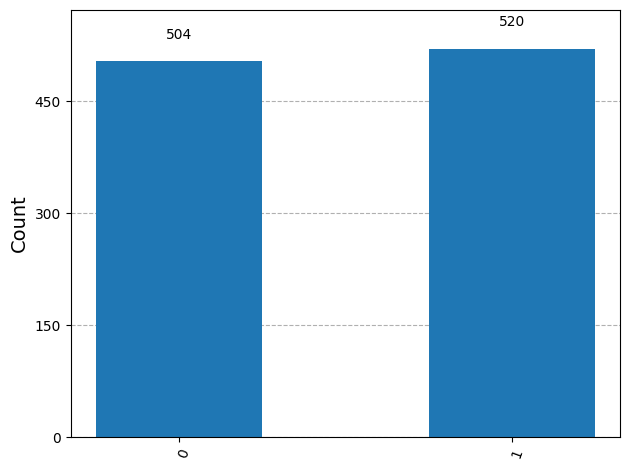

In [ ]:
# Listing 3.11: Circuit with measurement
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator # Import AerSimulator for backend

qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)

# observe the qubit
qc.measure_all()

# Use the backend defined in the previous cell
backend = AerSimulator()

# Do the simulation, returning the result
result = backend.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

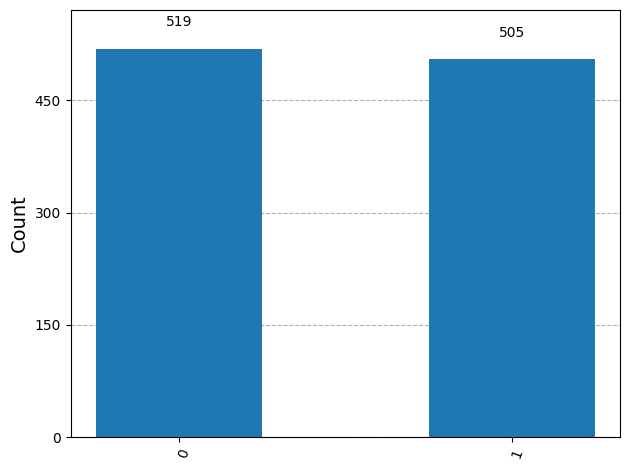

In [ ]:
# Listing 3.12: Another circuit with measurement
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator # Import AerSimulator for backend
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.measure_all()

# Use the backend defined in the previous cell
backend = AerSimulator()

# Do the simulation, returning the result
result = backend.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
# Listing 3.13: Draw a circuit with measurement
qc.draw(output='text')

┌─────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0

In [ ]:
# Listing 3.14: A simple PQC binary classifier (modified)
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator # Import AerSimulator for backend
from math import sqrt
from sklearn.metrics import recall_score, precision_score, confusion_matrix
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def pqc_classify(backend, passenger_state):
    # Create a quantum circuit with one qubit and one classical bit
    qc = QuantumCircuit(1, 1)

    # Define state |Psi> and initialize the circuit
    qc.initialize(passenger_state, 0)

    # Measure the qubit
    qc.measure(0, 0)

    # run the quantum circuit
    result = backend.run(qc).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts = result.get_counts(qc)

    # get the bit 0 or 1
    # Handle case where get_counts might return empty if no measurement occurred or simulation issue
    if counts:
        return int(list(map(lambda item: item[0], counts.items()))[0])
    else:
        print("Warning: No counts obtained from quantum circuit execution.")
        return 0 # Defaulting to 0, adjust as needed for your application

# Listing 3.16: Load and preprocess the data
# Load data from CSV files
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

train_labels = train_df['Survived'].values
# test_labels = test_df['Survived'].values # Removed as 'Survived' is not in test_df

# Select features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Combine train and test for consistent preprocessing
combined_df = pd.concat([train_df[features], test_df[features]], ignore_index=True)

# Handle missing values (example: fill with median for numerical, mode for categorical)
combined_df['Age'] = combined_df['Age'].fillna(combined_df['Age'].median())
combined_df['Fare'] = combined_df['Fare'].fillna(combined_df['Fare'].median())
combined_df['Embarked'] = combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0])

# Encode categorical features (example: Label Encoding for simplicity)
# You might consider One-Hot Encoding depending on the feature and classifier
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])

# Separate back into train and test
train_processed = combined_df.iloc[:len(train_df)]
test_processed = combined_df.iloc[len(train_df):]

train_input = train_processed.values
test_input = test_processed.values


def run(f_classify, x, backend):
    return [f_classify(backend, passenger_state) for passenger_state in x]


def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run_func, classify_func, input_data, labels, backend):
    cr_predictions = run_func(classify_func, input_data, backend)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))

# Listing 3.17: The scores of the random quantum classifier (modified)
backend = AerSimulator(method='statevector')

# Specify the quantum state that results in either 0 or 1
# This initial_state might need to be adapted based on your chosen encoding
# and what you want the 'random' classifier to represent.
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Use the loaded and preprocessed data (train_input and train_labels)
# Check if train_input is populated before running the report
if train_input is not None and train_labels is not None:
    classifier_report("Random PQC",
        run,
        lambda backend, passenger: pqc_classify(backend, initial_state), # Pass backend to pqc_classify
        train_input,
        train_labels,
        backend)
else:
    print("Warning: train_input or train_labels are not defined or are None. Cannot run Random PQC classifier report.")

The precision score of the Random PQC classifier is 0.40
The recall score of the Random PQC classifier is 0.51
The specificity score of the Random PQC classifier is 0.53
The npv score of the Random PQC classifier is 0.63
The information level is: 0.52


In [ ]:
# Listing 3.18: Initialization of classical (pseudo‐)random
import random
random.seed(a=None, version=2)

In [ ]:
# Listing 3.14: A simple PQC binary classifier (modified)


def pqc_classify(backend, passenger_state):
    # Create a quantum circuit with one qubit and one classical bit
    qc = QuantumCircuit(1, 1)

    # Define state |Psi> and initialize the circuit
    qc.initialize(passenger_state, 0)

    # Measure the qubit
    qc.measure(0, 0)

    # run the quantum circuit
    result = backend.run(qc).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts = result.get_counts(qc)

    # get the bit 0 or 1
    # Handle case where get_counts might return empty if no measurement occurred or simulation issue
    if counts:
        return int(list(map(lambda item: item[0], counts.items()))[0])
    else:
        print("Warning: No counts obtained from quantum circuit execution.")
        return 0 # Defaulting to 0, adjust as needed for your application

# Listing 3.20: Pre‐processing template
def pre_process(passenger):
    quantum_state = [1/sqrt(2), 1/sqrt(2)]
    return quantum_state

# Listing 3.21: The parameterized quantum circuit
from qiskit.result import Result # Import Result for type hinting (optional)

def pqc(backend: AerSimulator, quantum_state: list) -> Result:
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)

    # Define state |Psi> and initialize the circuit
    qc.initialize(quantum_state, 0)

    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result = backend.run(qc).result()

    return result

# Listing 3.22: Post‐processing
def post_process(counts):
    if '0' in counts and '1' in counts:
        return int(max(counts, key=counts.get))
    elif '0' in counts:
        return 0
    elif '1' in counts:
        return 1
    else:
        print("Warning: No counts returned from the quantum circuit.")
        return 0 # Defaulting to 0, adjust as needed

def run(f_classify, x, backend):
    return [f_classify(backend, passenger_state) for passenger_state in x]


def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run_func, classify_func, input_data, labels, backend):
    cr_predictions = run_func(classify_func, input_data, backend)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))

# Listing 3.23: The scores of the random quantum classifier
backend = AerSimulator(method='statevector')

# Assuming train_input and train_labels are defined and populated in a previous cell
if 'train_input' in locals() and train_input is not None and 'train_labels' in locals() and train_labels is not None:
    classifier_report(
        "Variational",
        run,
        lambda backend, passenger: post_process(pqc(backend, pre_process(passenger)).get_counts()),
        train_input,
        train_labels,
        backend)
else:
    print("Warning: train_input or train_labels are not defined or are None. Cannot run Variational classifier report.")

The precision score of the Variational classifier is 0.37
The recall score of the Variational classifier is 0.48
The specificity score of the Variational classifier is 0.48
The npv score of the Variational classifier is 0.60
The information level is: 0.48


In [ ]:
# Listing 3.24: weigh a passenger's feature
def weigh_feature(feature, weight):
    return feature*weight
# Listing 3.25: Calculate the overall probability
from functools import reduce

def get_overall_probability(features, weights):
    return reduce(
        lambda result, data: result + weigh_feature(*data),
        zip(features, weights),
        0
    )
# Listing 3.26: Calculate the correlation coefficients
from scipy.stats import spearmanr

# separate the training data into a list of the columns
columns = [list(map(lambda passenger: passenger[i], train_input)) for i in range(0,7)]

# calculate the correlation coefficient for each column
correlations = list(map(lambda col: spearmanr(col, train_labels)[0], columns))
correlations

[np.float64(-0.33966793665005257),
 np.float64(-0.5433513806577551),
 np.float64(-0.03700449741729798),
 np.float64(0.08887948468090501),
 np.float64(0.13826563286545587),
 np.float64(0.32373613944480834),
 np.float64(-0.1601964408015638)]

In [ ]:
# Listing 3.24: weigh a passenger's feature
def weigh_feature(feature, weight):
    return feature*weight

# Listing 3.25: Calculate the overall probability
from functools import reduce

def get_overall_probability(features, weights):
    return reduce(
        lambda result, data: result + weigh_feature(*data),
        zip(features, weights),
        0
    )

# Listing 3.26: Calculate the correlation coefficients
from scipy.stats import spearmanr

# Ensure train_input and train_labels are defined and populated before this.
# Assuming train_input is a NumPy array where columns are features and rows are samples.
if 'train_input' in locals() and train_input is not None and 'train_labels' in locals() and train_labels is not None:
    columns = [list(train_input[:, i]) for i in range(train_input.shape[1])]

    # calculate the correlation coefficient for each column
    correlations = list(map(lambda col: spearmanr(col, train_labels)[0], columns))
else:
    correlations = []
    print("Warning: train_input or train_labels are not populated. Cannot calculate correlations.")


# Listing 3.27: The weighting pre‐processing


def get_state (theta):
    return [cos(theta/2), sin(theta/2)]

def pre_process_weighted(passenger):

    local_correlations = globals().get('correlations', None)

    if not local_correlations or len(local_correlations) != len(passenger):
         print("Warning: Correlations not properly calculated or do not match feature count. Using default state.")
         return [1/sqrt(2), 1/sqrt(2)]

    # caluclate the overall probability
    mu = get_overall_probability(passenger, local_correlations)

    # theta between 0 (|0>) and pi (|1>)
    quantum_state = get_state((1-mu)*pi)

    return quantum_state

# Listing 3.21: The parameterized quantum circuit (included for self-containment)
def pqc(backend: AerSimulator, quantum_state: list) -> Result:
    qc = QuantumCircuit(1)
    qc.initialize(quantum_state, 0)
    qc.measure_all()
    result = backend.run(qc).result()
    return result

# Listing 3.22: Post‐processing
def post_process(counts):
    # Return both the predicted class and the counts
    if counts:
        predicted_class = int(max(counts, key=counts.get))
        return predicted_class, counts
    else:
        print("Warning: No counts returned from the quantum circuit.")
        return 0, {} # Defaulting to 0 and empty counts

def run(f_classify, x, backend):
    predictions_with_probs = []
    # Ensure x is iterable
    if x is None:
        print("Error: Input data 'x' is None.")
        return []
    for passenger_state in x:
        predicted_class, counts = f_classify(backend, passenger_state)
        predictions_with_probs.append((predicted_class, counts))
    return predictions_with_probs

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run_func, classify_func, input_data, labels, backend):
    # Ensure input_data and labels are valid before proceeding
    if input_data is None or labels is None or len(input_data) != len(labels):
        print(f"Error: Cannot run classifier report for {name}. Input data and labels are not valid or have inconsistent lengths.")
        return

    results_with_probs = run_func(classify_func, input_data, backend)
    cr_predictions = [result[0] for result in results_with_probs] # Extract only the predictions

    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))

    # Print predictions with probabilities
    print("\nPredictions with Probabilities:")
    for i, (prediction, counts) in enumerate(results_with_probs):
        print(f"Sample {i}: Prediction = {prediction}, Probabilities = {counts}")


# Listing 3.28: Run the PQC with the weighted pre‐processing
backend = AerSimulator(method='statevector')

# Check if train_input and train_labels are populated before running the report
if 'train_input' in locals() and train_input is not None and 'train_labels' in locals() and train_labels is not None:
    classifier_report("Variational",
        run,
        lambda backend, passenger: post_process(pqc(backend, pre_process_weighted(passenger)).get_counts()),
        train_input,
        train_labels,
        backend)
else:
    print("Warning: train_input or train_labels are not defined or are None. Cannot run Variational classifier report.")

The precision score of the Variational classifier is 0.37
The recall score of the Variational classifier is 0.56
The specificity score of the Variational classifier is 0.40
The npv score of the Variational classifier is 0.59
The information level is: 0.48


In [ ]:
backend = AerSimulator(method='statevector')

if 'test_input' in locals() and test_input is not None:
     # Check if test_labels is available and has the same number of samples as test_input
     if 'test_labels' in locals() and test_labels is not None and len(test_labels) == len(test_input):
         classifier_report("Variational-Test",
             run,
             lambda backend, passenger: post_process(pqc(backend, pre_process_weighted(passenger)).get_counts()),
             test_input,
             test_labels, # Use test_labels for evaluation
             backend)
     else:
         print("Warning: test_labels is not available, is None, or has a different number of samples than test_input.")
         print("Cannot run classifier report on test data without correct labels for evaluation.")
         # If test_labels are not available, you can generate predictions
         predictions = run(lambda backend, passenger: post_process(pqc(backend, pre_process_weighted(passenger)).get_counts()), test_input, backend)
         print("Generated predictions for test data:")
         print(predictions)
else:
    print("Warning: test_input is not defined or is None. Cannot run classifier report on test data.")

Cannot run classifier report on test data without correct labels for evaluation.
Generated predictions for test data:
[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,